In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from keras.utils.vis_utils import plot_model

In [2]:
dataset = pd.read_csv('Cancer_Data.csv')
dataset.shape

(569, 33)

In [3]:
#removing the unamed32 column
dataset.drop('Unnamed: 32',axis=1,inplace=True)
dataset.drop('id',axis=1,inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#binaryzing the diagonsis column
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})  

In [7]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#quanity of malignant and benign
counts = dataset['diagnosis'].value_counts()

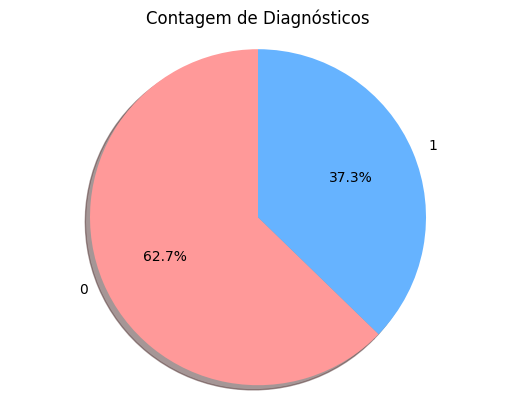

In [9]:
fig, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,shadow=True,colors=colors)
ax.axis('equal')
ax.set_title('Contagem de Diagnósticos')
plt.show()

In [10]:
#criando um gráfico scatter plot do raio médio e textura média dos canceres
maligno = dataset[dataset['diagnosis'] == 1]
benigno = dataset[dataset['diagnosis'] == 0]

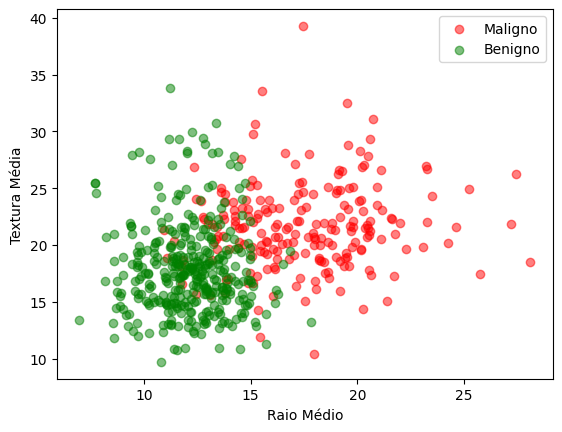

In [11]:
plt.scatter(maligno.radius_mean,maligno.texture_mean,color='red',label='Maligno',alpha=0.5)
plt.scatter(benigno.radius_mean,benigno.texture_mean,color='green',label='Benigno',alpha=0.5)

plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')

plt.legend()
plt.show()

In [12]:
def plot_hist(var):
    plt.hist(maligno[var],bins=30,color='red',alpha=0.5,label='Maligno')
    plt.hist(benigno[var],bins=30,color='green',alpha=0.5,label='Benigno')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
def violin_plot(var):
    fig, ax = plt.subplots()
    ax.violinplot([maligno[var],benigno[var]])
    ax.set_xticks([1,2])
    ax.set_xticklabels(['Maligno','Benigno'])
    plt.ylabel(var)
    plt.show()

In [14]:
numerical_values = (dataset.dtypes == 'float64')
list_of_numerical_values = list(numerical_values[numerical_values].index)

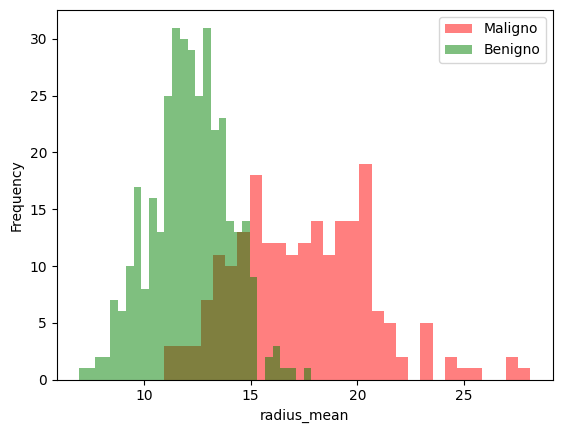

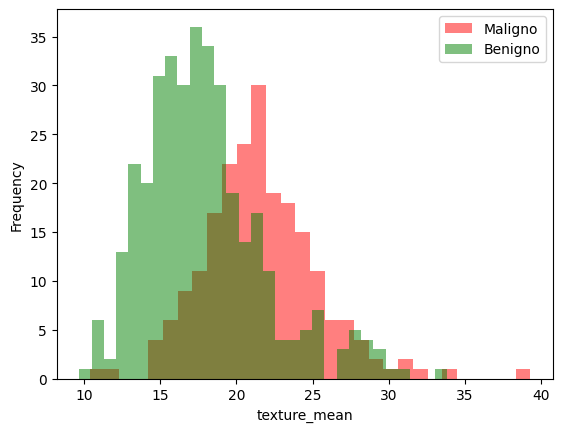

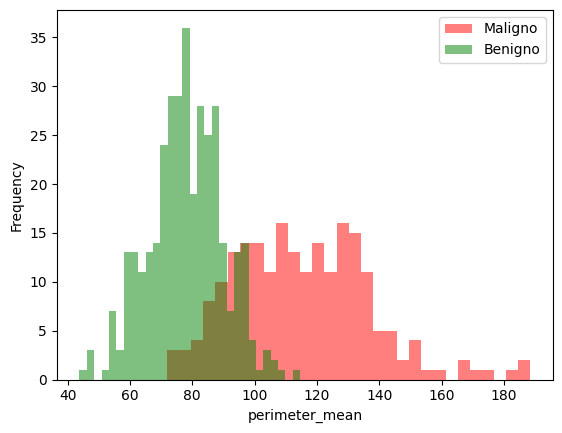

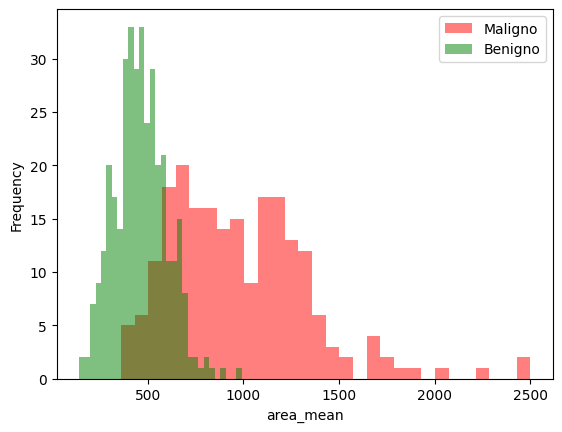

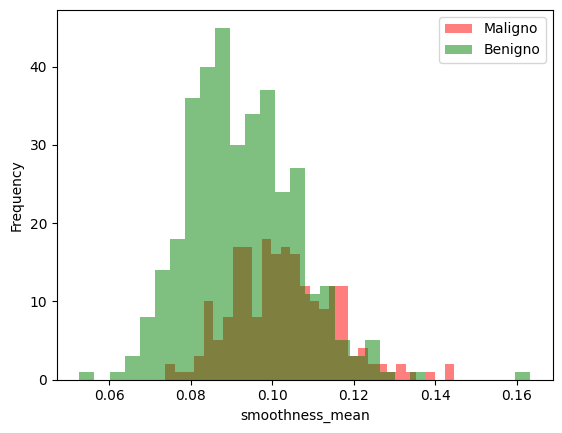

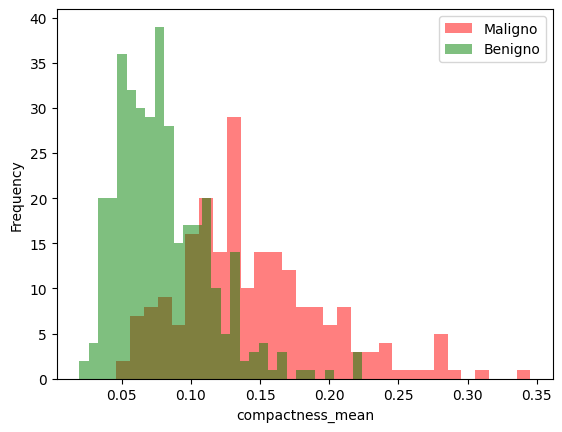

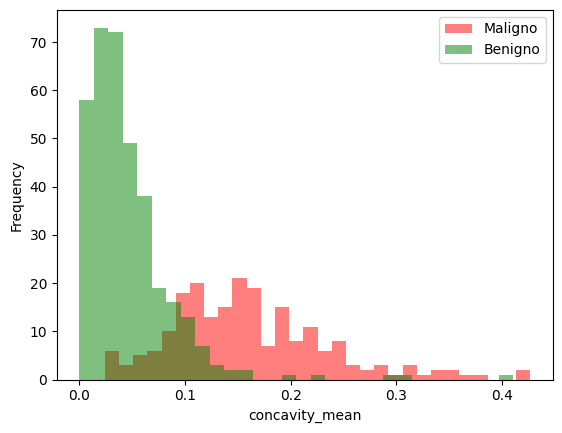

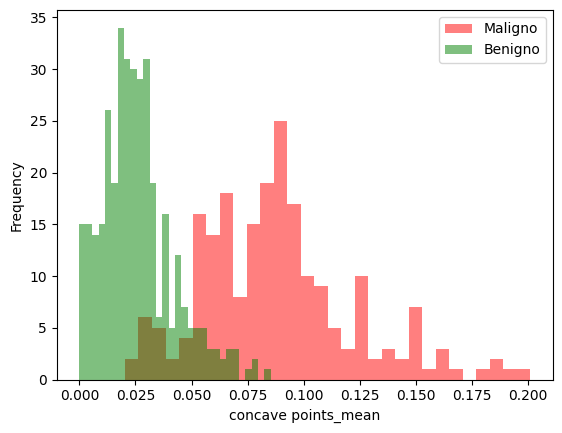

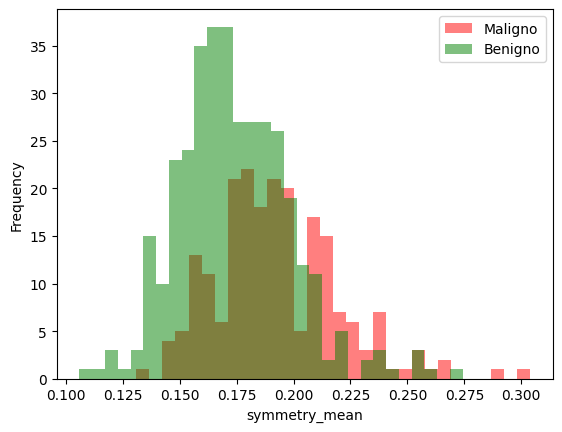

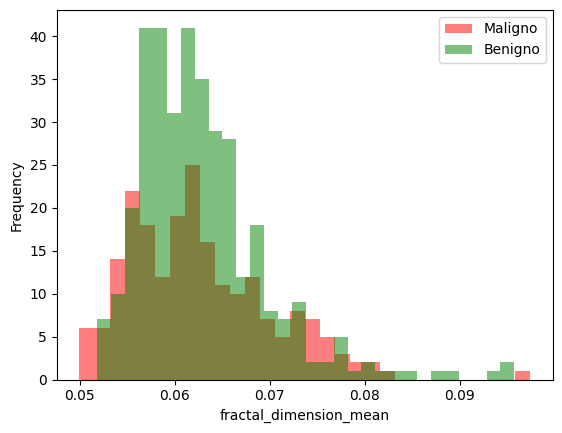

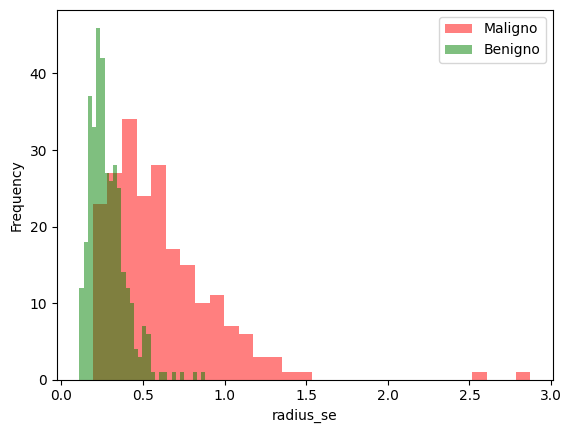

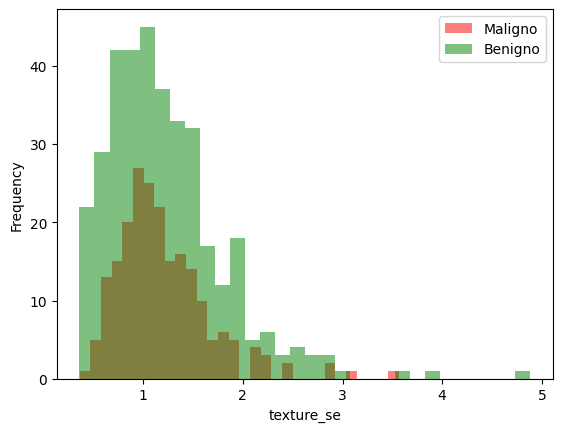

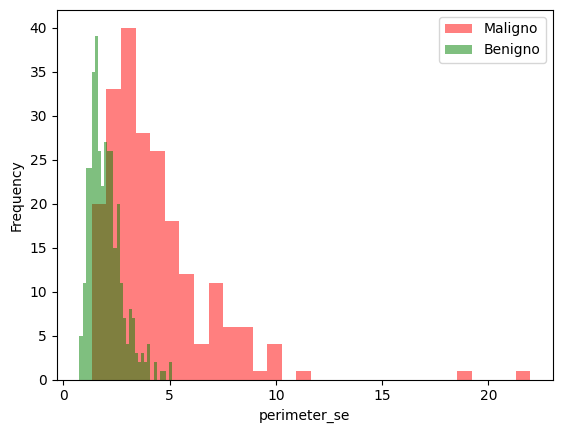

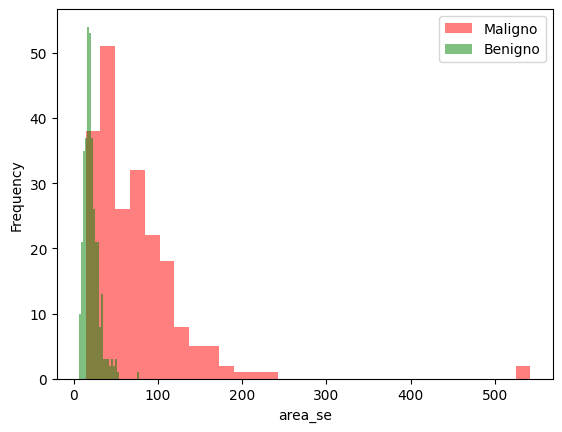

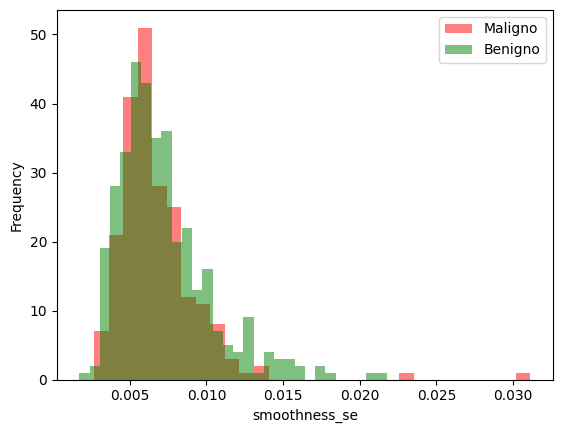

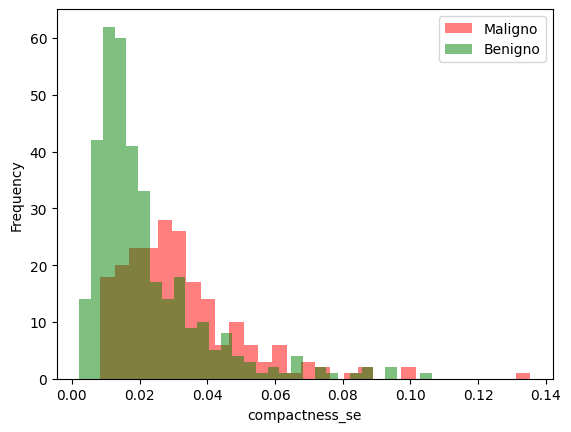

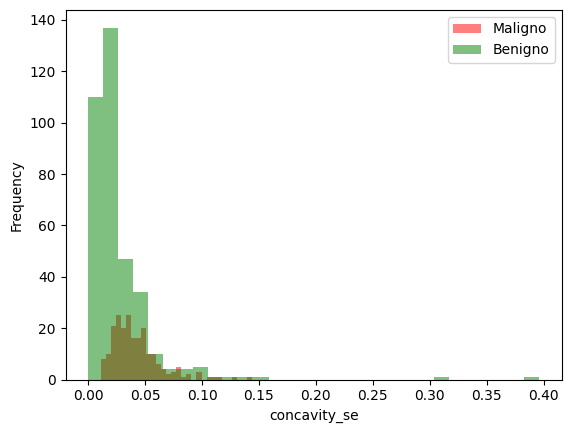

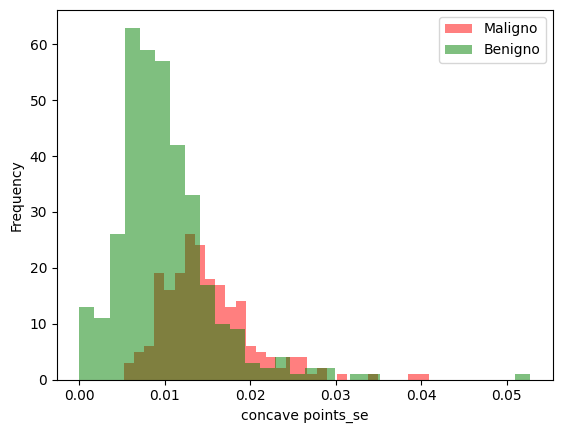

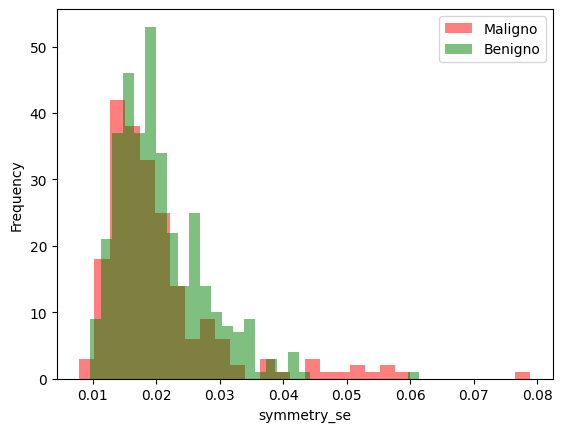

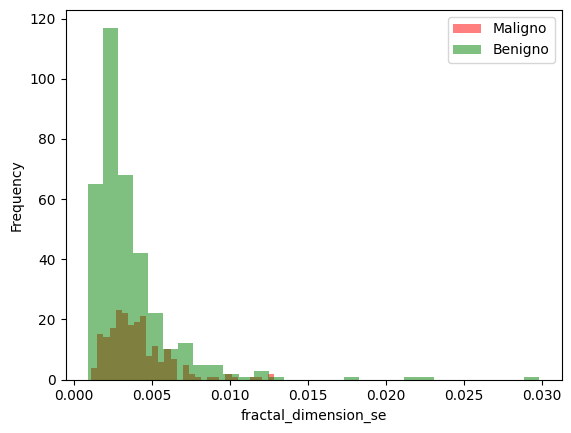

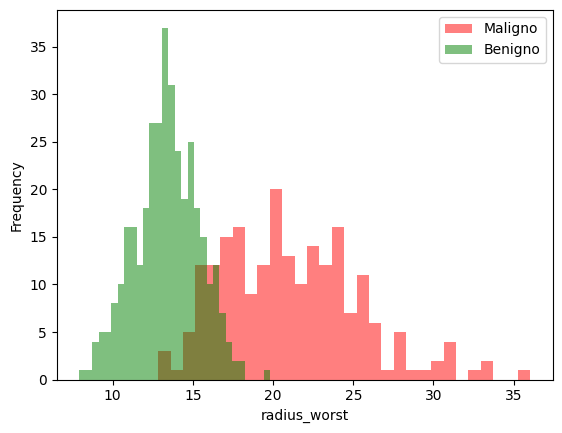

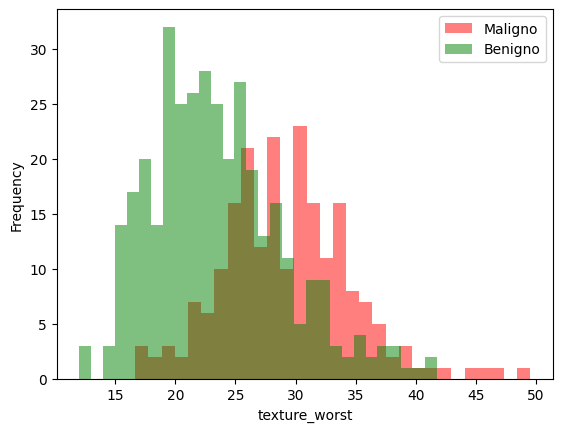

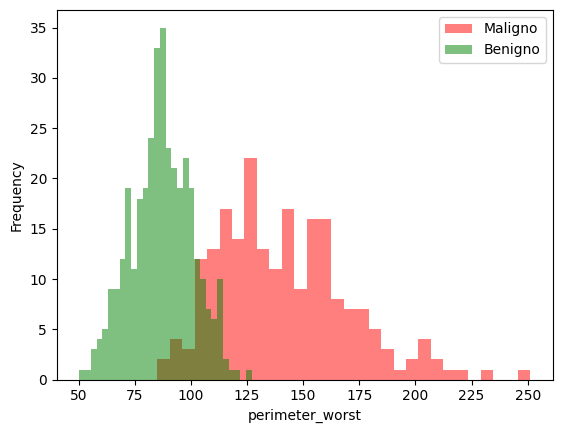

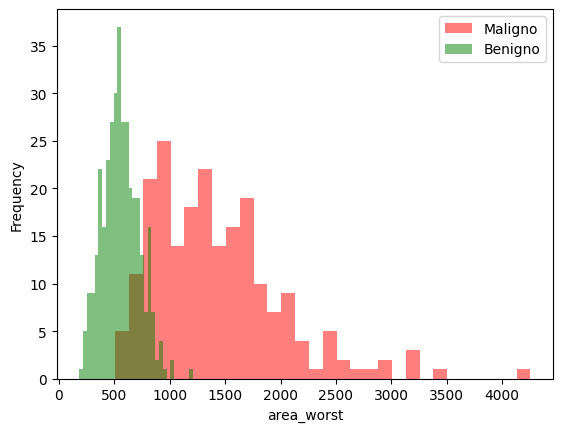

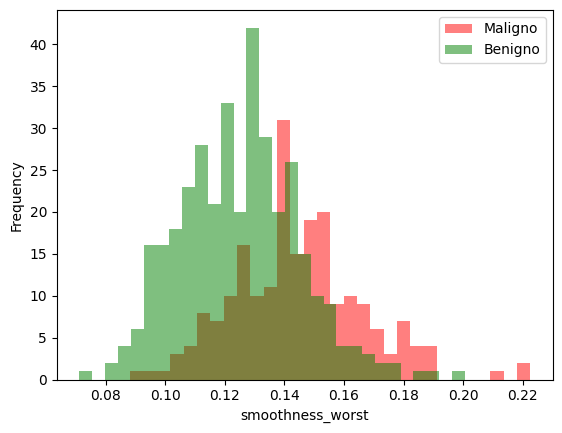

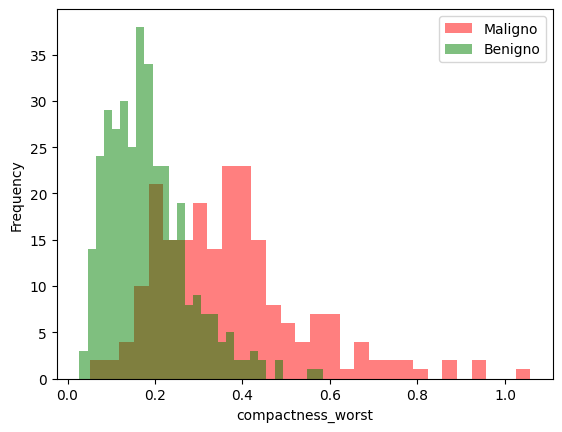

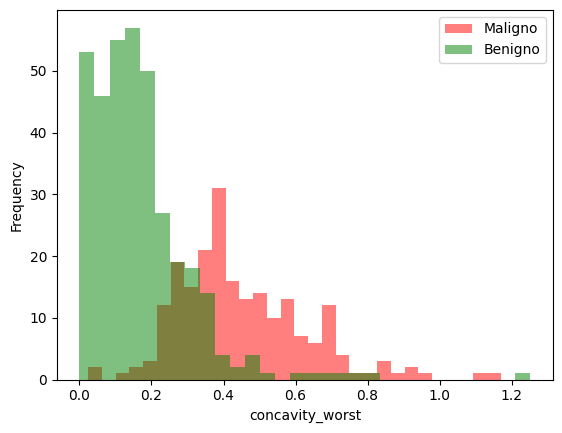

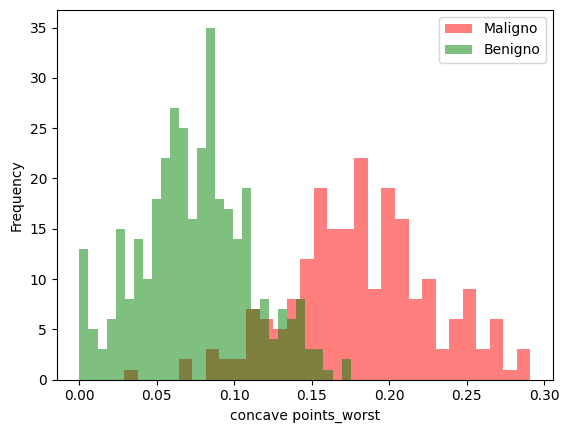

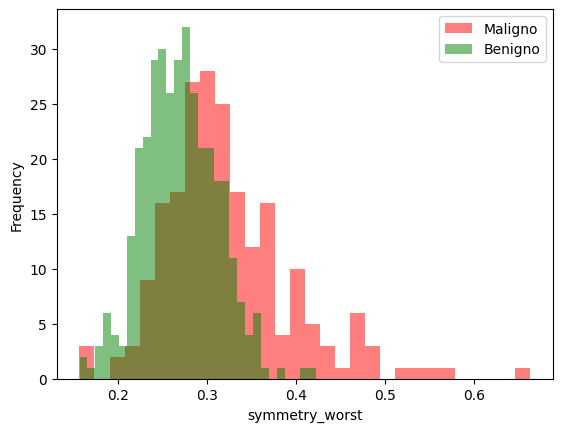

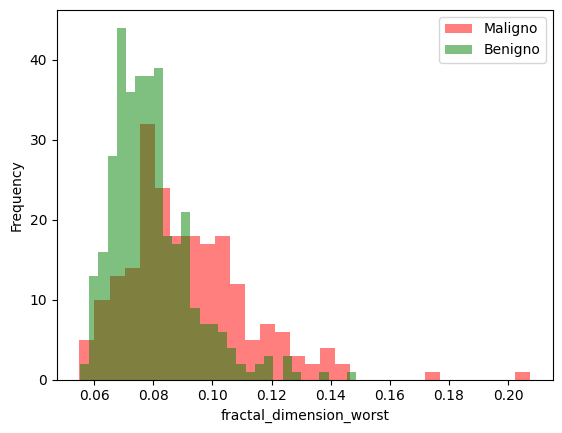

In [15]:
#using the function to plot the histograms for all the numerical values
for i in list_of_numerical_values:
    plot_hist(i)

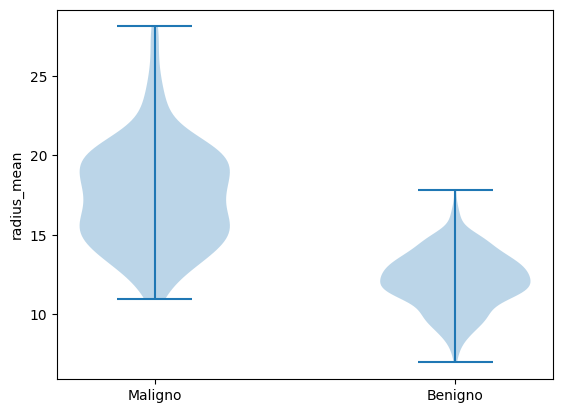

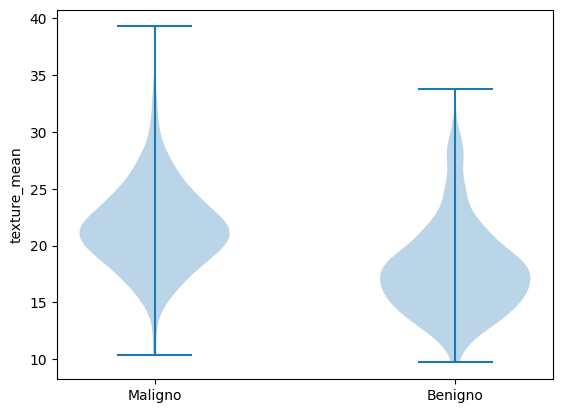

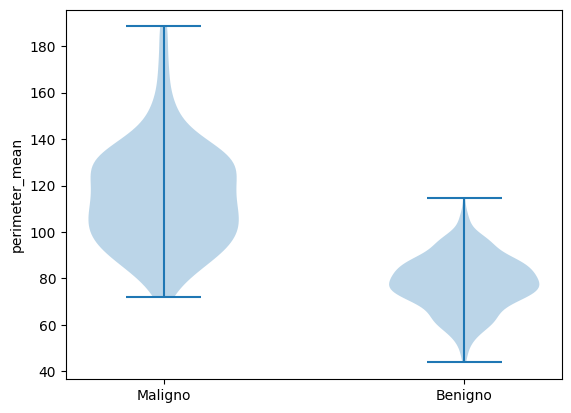

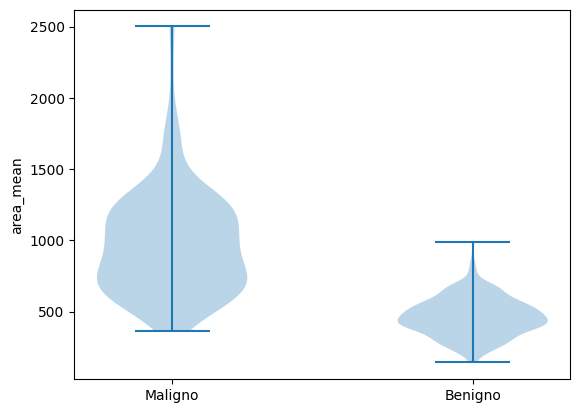

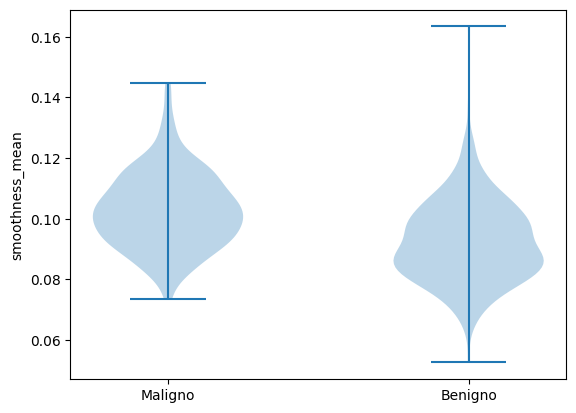

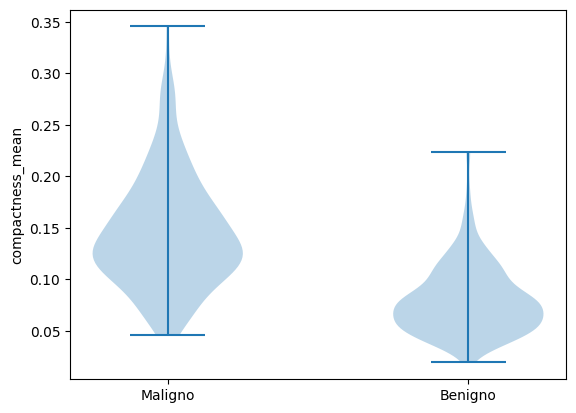

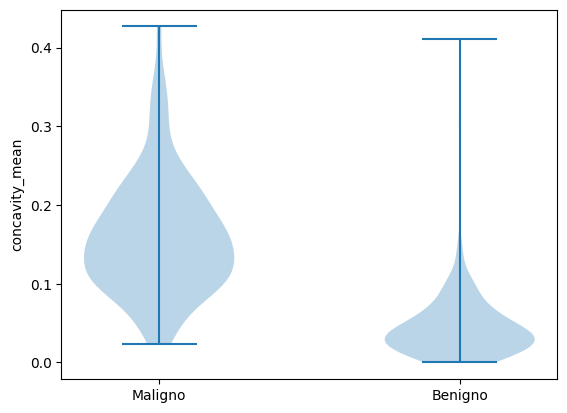

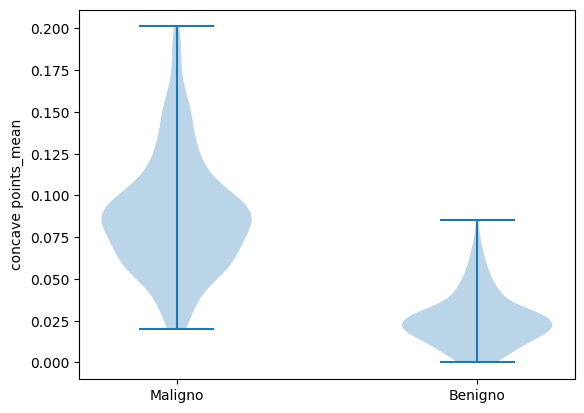

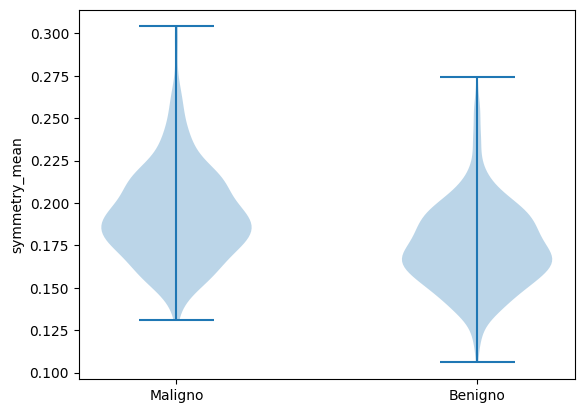

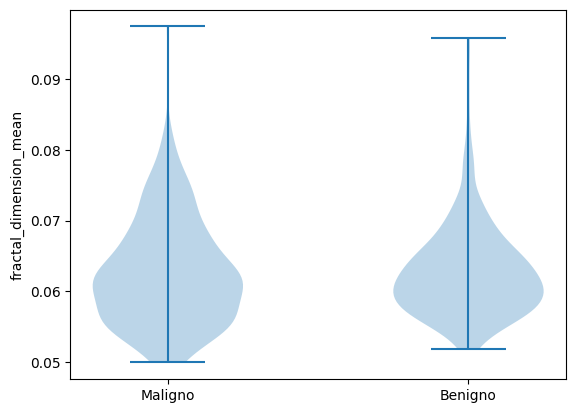

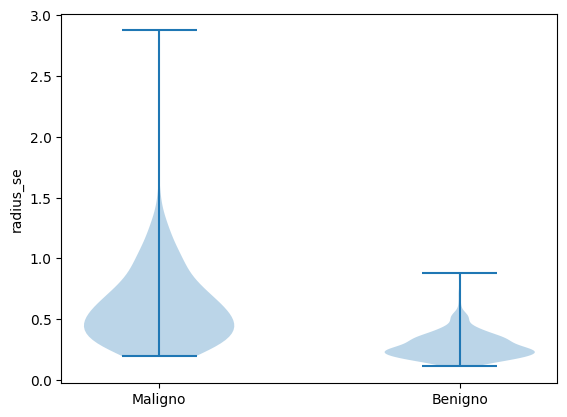

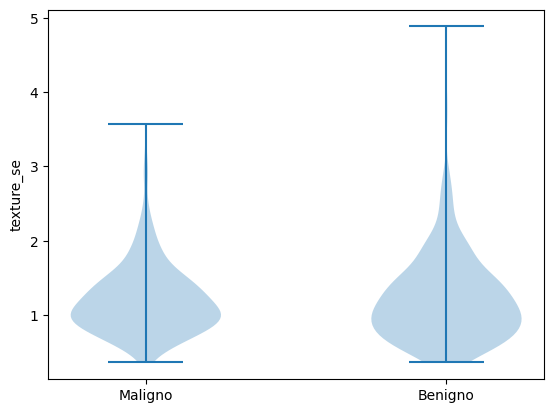

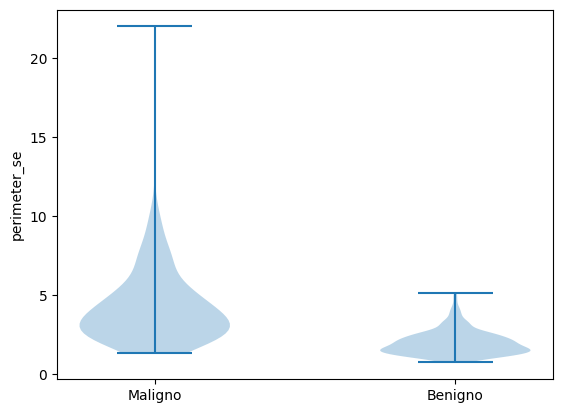

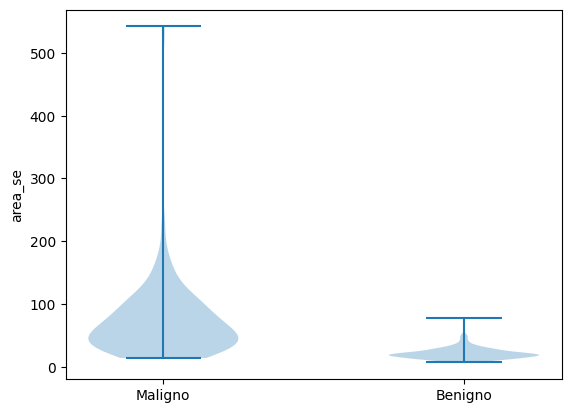

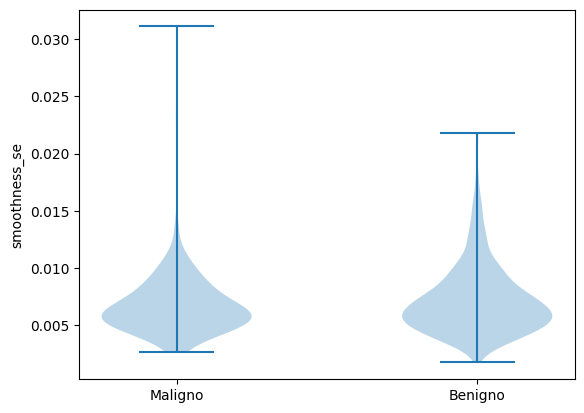

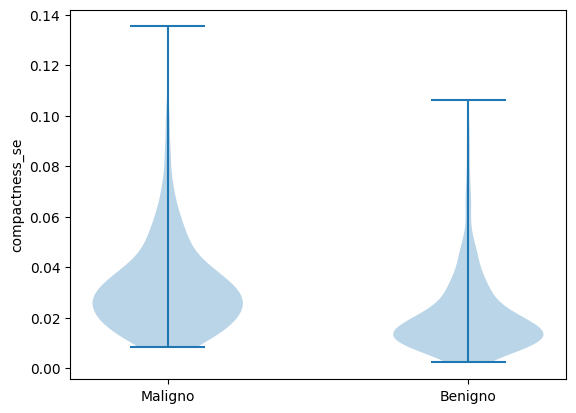

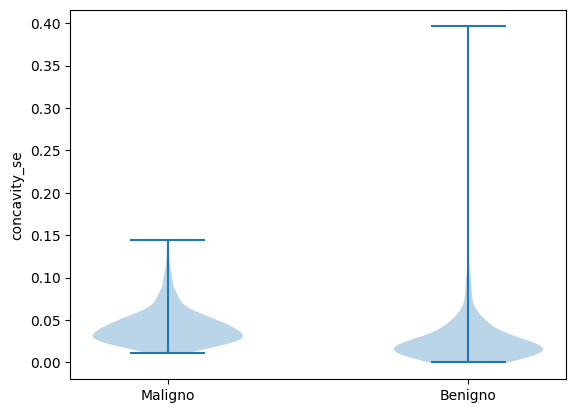

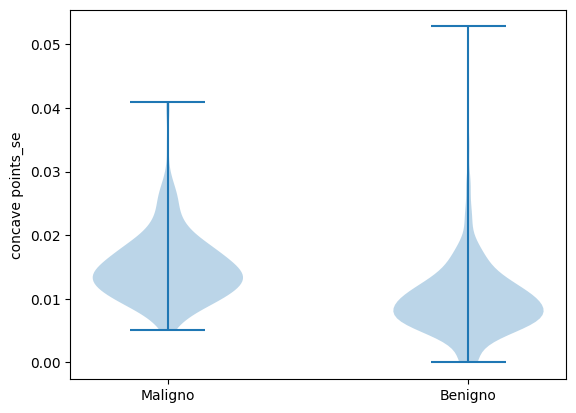

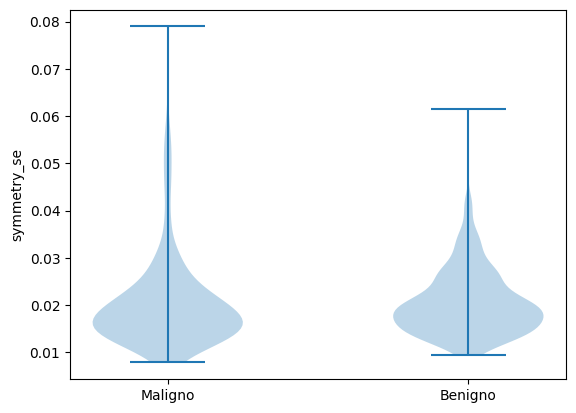

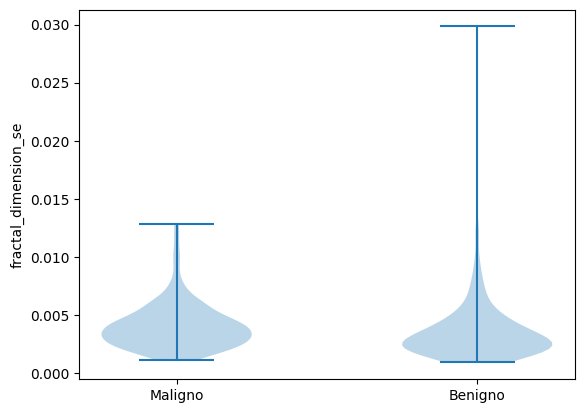

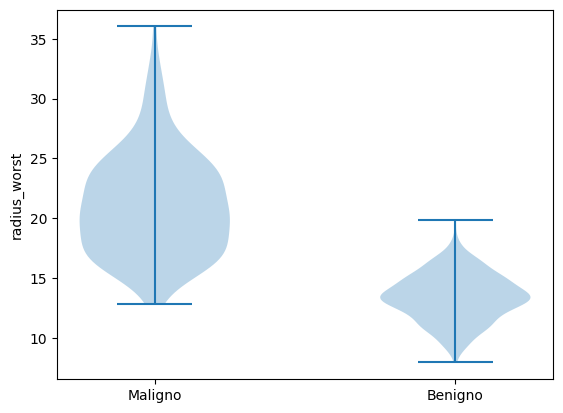

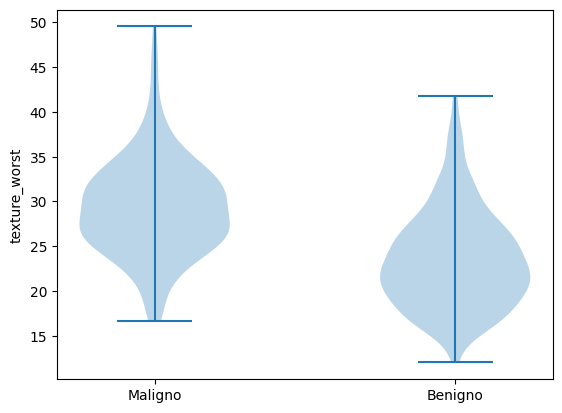

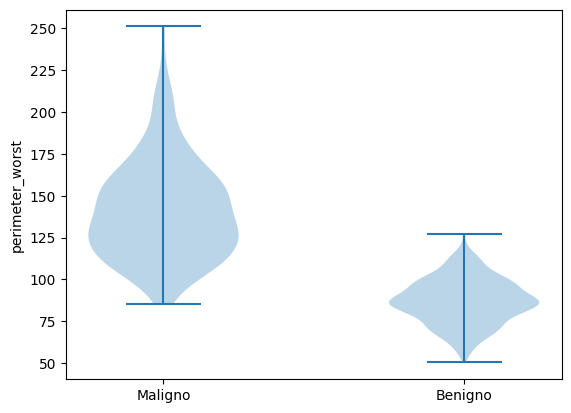

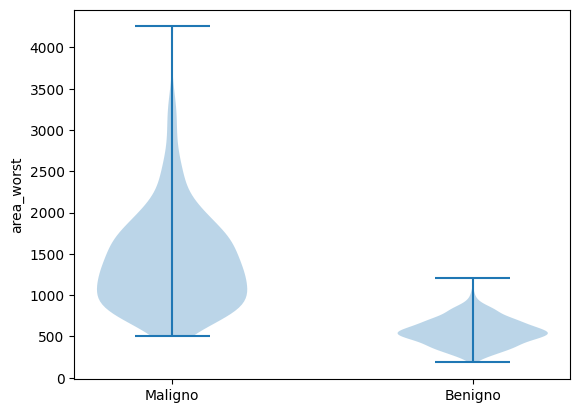

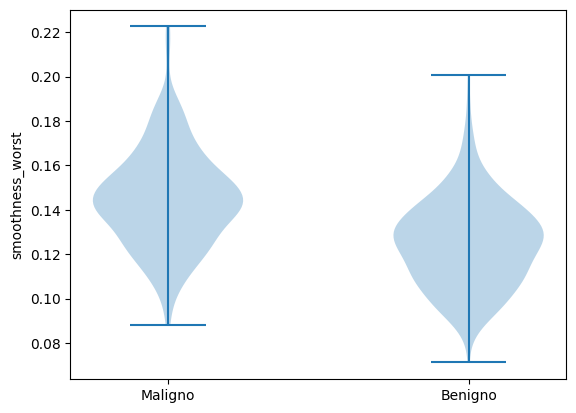

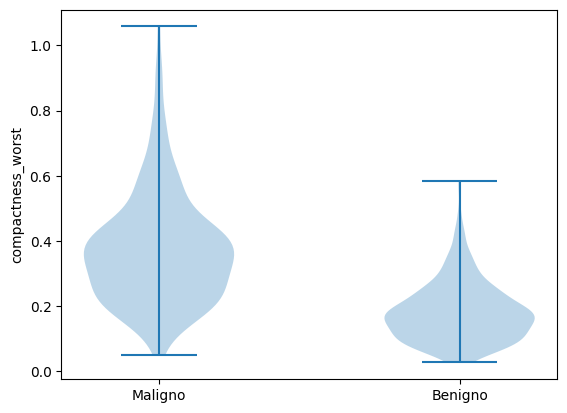

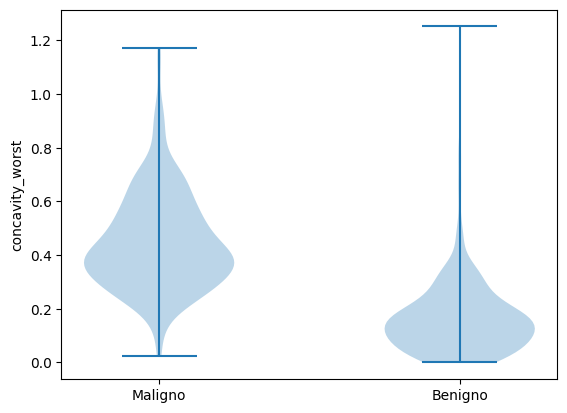

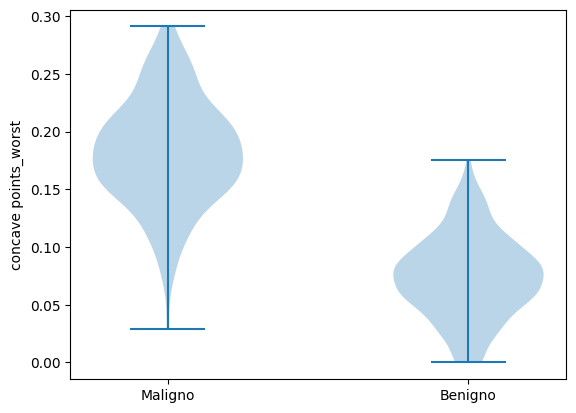

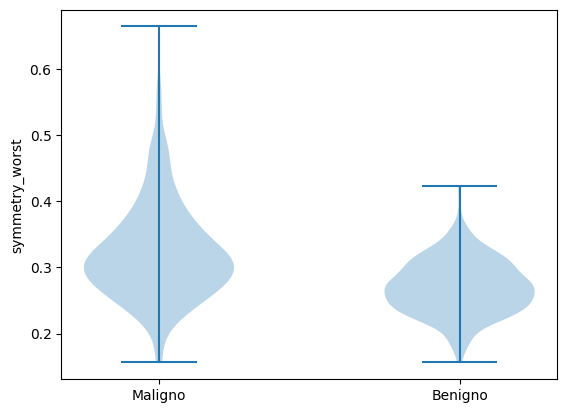

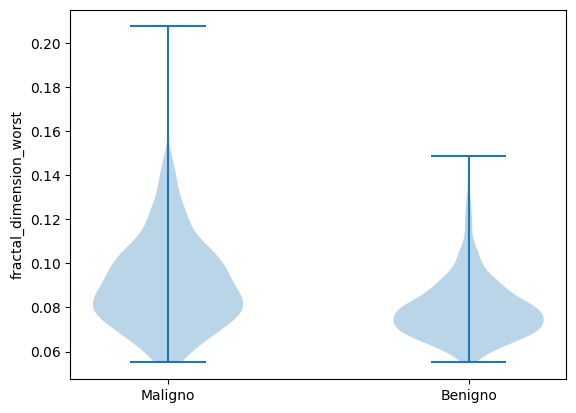

In [16]:
for i in list_of_numerical_values:
    violin_plot(i)

In [17]:
dataset.groupby('diagnosis').mean() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


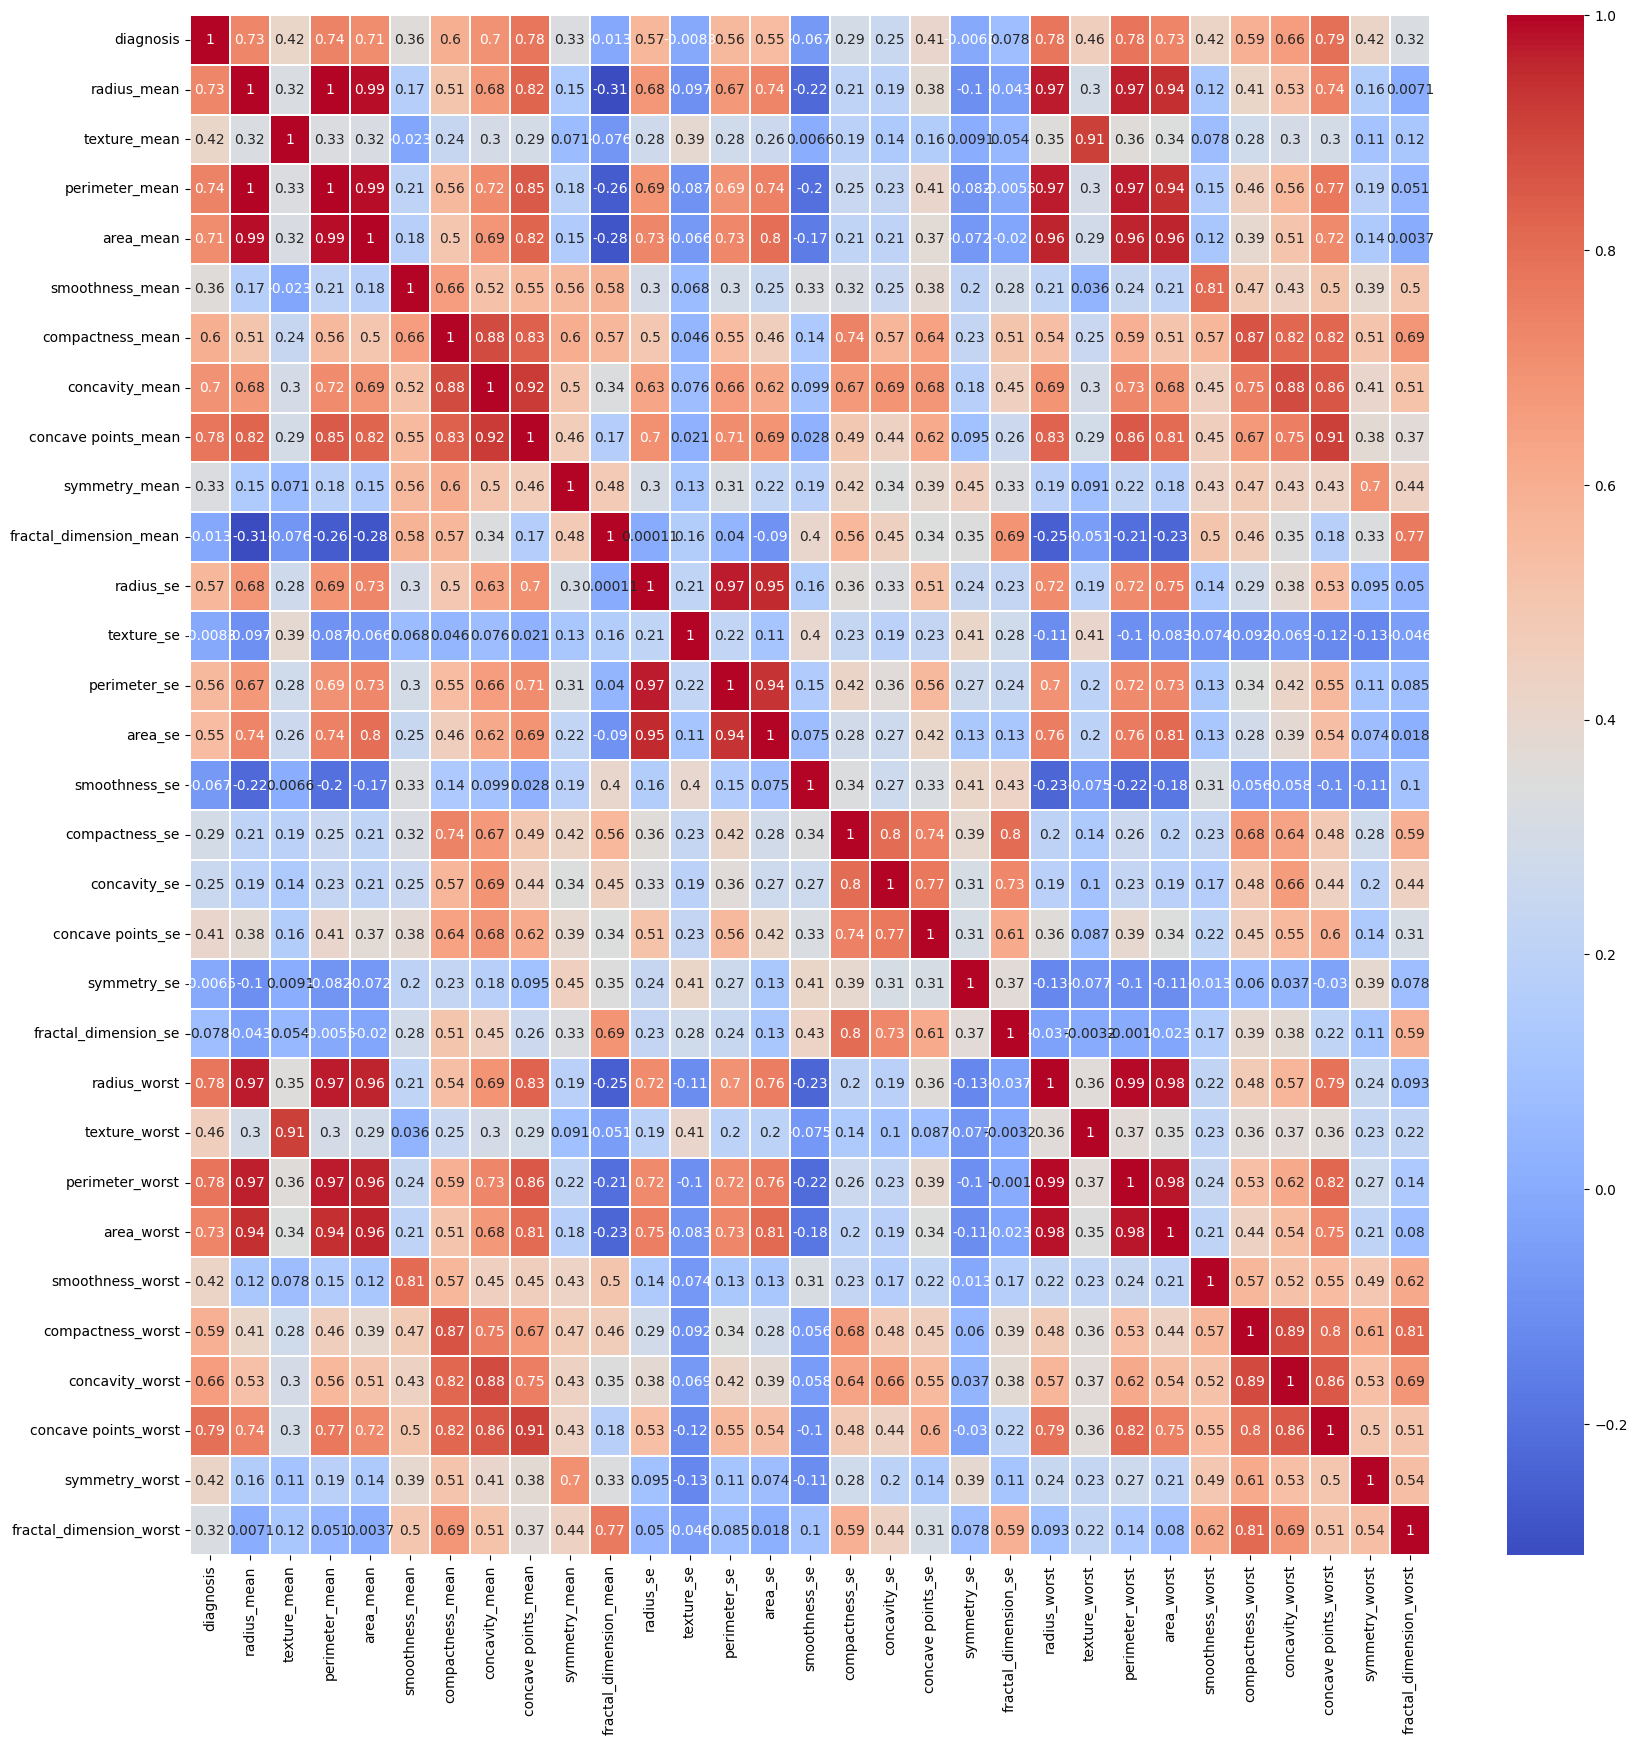

In [18]:
import seaborn as sns
#getting the correlation
corr = dataset.corr()
#using seaborn to plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2)
plt.show()

Através da tabela acima é possível notar diferenças significativas em tumores malignos e benignos

---Tratamento dos Dados Pré treino---

In [19]:
X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']

In [20]:
x = np.array(X)
y = np.array(y)

In [21]:
def scaling_data(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [22]:
def plot_before_after_norm(x0,x1):
    #showing all the features before and after normalization
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.plot(x0)
    plt.title('Before Normalization')
    plt.subplot(1,2,2)
    plt.plot(x1)
    plt.title('After Normalization')
    plt.show()

In [23]:
print(x[0]) #exemplificando os dados antes do scaling
before = x[0] 

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [24]:
x = scaling_data(x)
after = x[0]

In [25]:
print(x[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


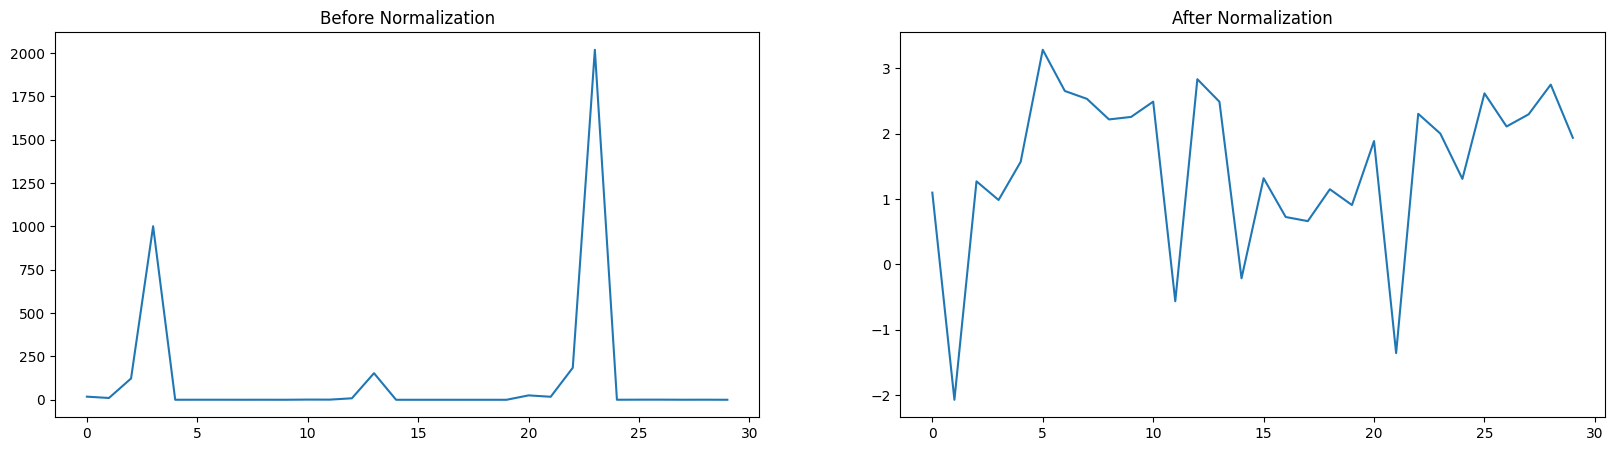

In [26]:
plot_before_after_norm(before,after)

In [27]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [29]:
#Exibindo a quantidade de dados para cada tarefa
print(len(x_train), 'train examples')
print(len(x_valid), 'validation examples')
print(len(x_test), 'test examples')

364 train examples
91 validation examples
114 test examples


In [30]:
input_shape = x_train.shape[1:]
print(input_shape)

(30,)


In [31]:
def create_model(num_layers=1,num_neurons=30,learning_rate=3e-3,input_shape=input_shape,activation='relu'):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(num_layers):
        model.add(keras.layers.Dense(num_neurons,activation=activation))
        
    model.add(keras.layers.Dense(2,activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

    return model

In [32]:
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)

C:\Users\lucca\AppData\Local\Temp\ipykernel_9660\1774769082.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)


In [33]:
from scipy.stats import reciprocal

In [34]:
param_dist = {
    'num_layers':[1,2,3,4,5],
    'num_neurons': np.arange(10,35),
    'learning_rate': reciprocal(3e-4,3e-2),
    'activation':['relu','sigmoid','tanh']
}

In [35]:
search = RandomizedSearchCV(
    model,
    param_dist,
    cv=3,
    n_iter=15,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3)

In [36]:
search.fit(x_train,y_train,epochs=15,validation_data=(x_valid,y_valid),callbacks=
           [keras.callbacks.EarlyStopping(patience=5,monitor='val_loss')])

Fitting 3 folds for each of 15 candidates, totalling 45 fits


Epoch 1/15
12/12 [==============================] - 2s 26ms/step - loss: 0.2131 - accuracy: 0.9203 - val_loss: 0.1854 - val_accuracy: 0.9451
Epoch 2/15
12/12 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9698 - val_loss: 0.2119 - val_accuracy: 0.9451
Epoch 3/15
12/12 [==============================] - 0s 7ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.2419 - val_accuracy: 0.9451
Epoch 4/15
12/12 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9780 - val_loss: 0.1129 - val_accuracy: 0.9780
Epoch 5/15
12/12 [==============================] - 0s 7ms/step - loss: 0.0474 - accuracy: 0.9918 - val_loss: 0.1338 - val_accuracy: 0.9670
Epoch 6/15
12/12 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9835 - val_loss: 0.1883 - val_accuracy: 0.9560
Epoch 7/15
12/12 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9863 - val_loss: 0.1925 - val_accuracy: 0.9560
Epoch 8/15
12/12 [=

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A95A0F2A90>,
                   n_iter=15, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'sigmoid',
                                                       'tanh'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A95975FB90>,
                                        'num_layers': [1, 2, 3, 4, 5],
                                        'num_neurons': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34])},
                   scoring='accuracy', verbose=3)

In [37]:
#print(search.best_params_)
print(search.best_score_)

0.9834936548796459


In [38]:
#creating an printing a dict of the best parameters
best_params = search.best_params_
for param,value in best_params.items():
    print(param,value)
    

activation tanh
learning_rate 0.011748738278716349
num_layers 4
num_neurons 13


In [39]:
#now testing the model with the test set
model = search.best_estimator_.model
hist = search.best_estimator_.model.history.history
loss, acc = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0648 - accuracy: 0.9825


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                403       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dense_4 (Dense)             (None, 2)                 28        
                                                                 
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


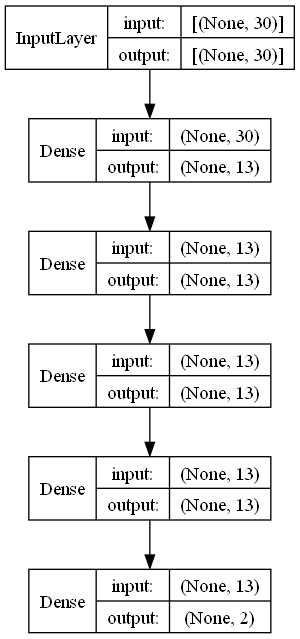

In [41]:
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=False)

In [42]:
print('Test accuracy: {:5.2f}%'.format(100*acc))

Test accuracy: 98.25%


In [43]:
#loss
print('Test loss' , loss)

Test loss 0.06482552736997604


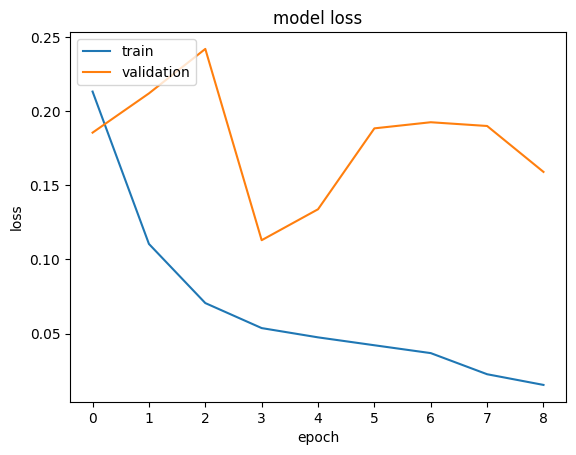

In [44]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [45]:
class_labels = ['Benigno', 'Maligno']

In [46]:
def plot_confusion_matrix(cm, class_labels):
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Plot the confusion matrix as an image
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    # Add a colorbar
    cbar = fig.colorbar(cax)

    # Set the tick labels and positions to the class labels
    ax.set_xticks(np.arange(len(class_labels)))
    ax.set_yticks(np.arange(len(class_labels)))
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)

    # Set the axis labels
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Set the title
    ax.set_title('Confusion Matrix')

    # Add value annotations to the plot
    for i in range(len(cm)):
        for j in range(len(cm)):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center')

    # Display the plot
    plt.show()

In [47]:
#predicting just the first one
print(model.predict(x_test[0].reshape(1,-1)),(y_test[0]))


1/1 [==============================] - 0s 149ms/step
[[0.9798488  0.08328543]] 0


In [48]:
from sklearn.metrics import confusion_matrix

#getting the true labels
y_true = y_test
#predicting the labels
y_pred = model.predict(x_test)

cm = confusion_matrix(y_true,y_pred.argmax(axis=1))

4/4 [==============================] - 0s 1ms/step


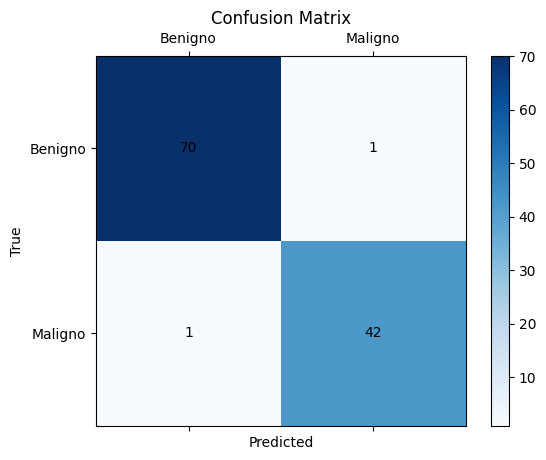

In [49]:
plot_confusion_matrix(cm,class_labels)

In [50]:
#creating the confusion matrix for the full train
y_true = y_train_full
y_pred = model.predict(x_train_full)
conf = confusion_matrix(y_true,y_pred.argmax(axis=1))

15/15 [==============================] - 0s 1ms/step


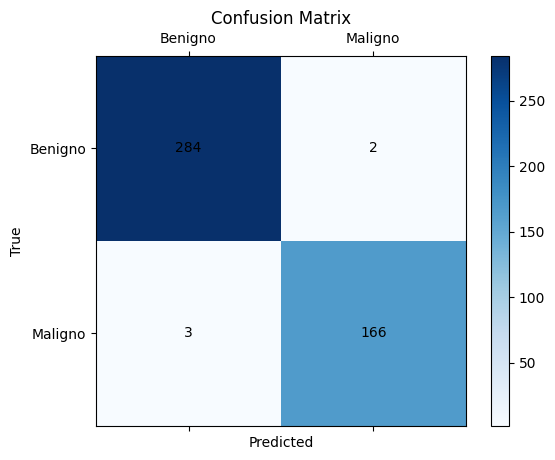

In [51]:
plot_confusion_matrix(conf,class_labels)

In [52]:
#saving the model
model.save('cancer_model.h5')